Interesting patterns of the original clf on friends below. Picture does matter A LOT. 

In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/friends_and_myself_pics_faces_encodings.pickle')


count    35.000000
mean      0.507562
std       0.169273
min       0.149555
25%       0.388999
50%       0.558159
75%       0.644803
max       0.844545
dtype: float64
skew --  -0.19826775612045852
kurtosis -- -0.8826911055852733


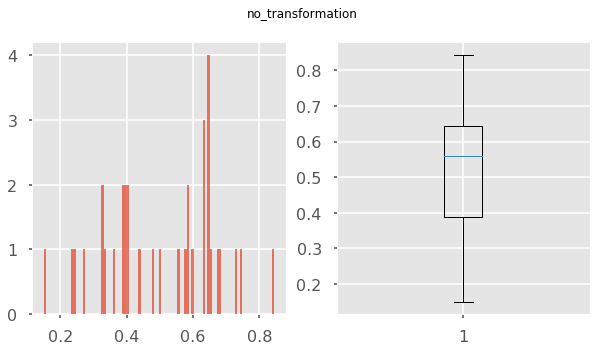

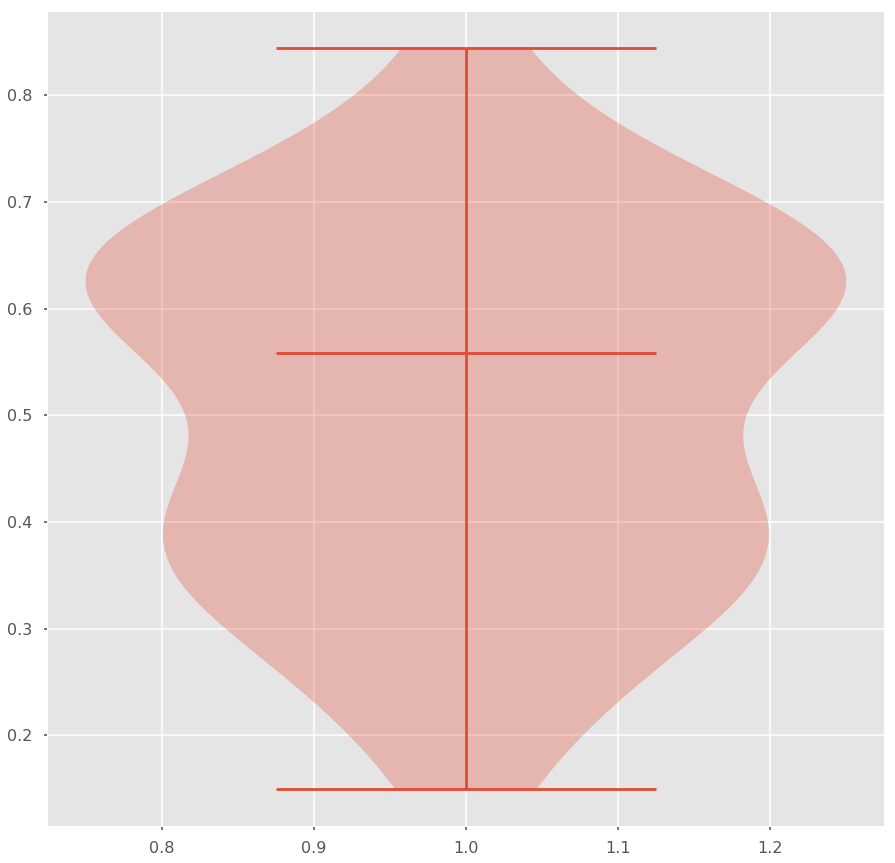

In [5]:
lr = pickle.load(open('lr_tinderlikes.pickle','rb'))
probas = pd.Series(lr.predict_proba(encodings)[:,1])
plot_distribution(probas)

In [15]:
num_of_bins = 5
sorted_imgs = sorted(zip(probas, arrays_rescaled), key=lambda x: x[0], reverse=True)
sorted_arrays_rescaled  = [img[1] for img in sorted_imgs]
sorted_probas = [img[0] for img in sorted_imgs]

bin_bounds = list(map(lambda x: x/100, list(range(0,100, int(100/num_of_bins)))))
bin_labels = pd.cut(sorted_probas, bins=bin_bounds, labels=list(range(1, num_of_bins )))


1
1


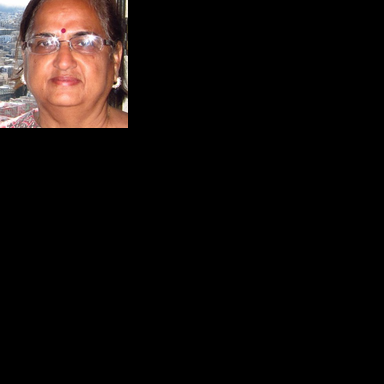

2
11


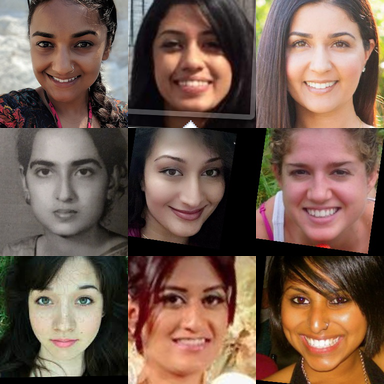

3
10


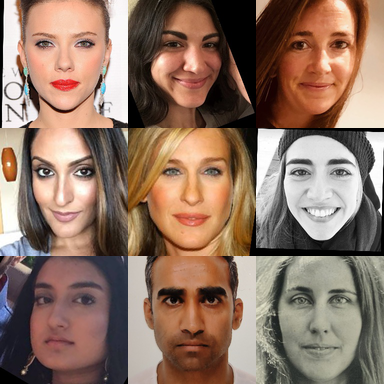

4
12


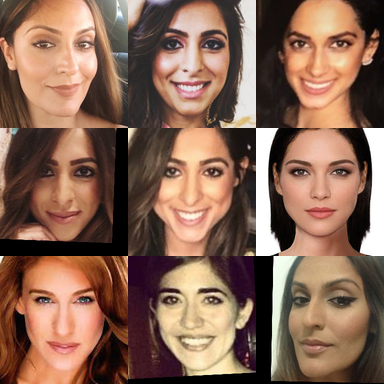

In [16]:
from image_helpers import _square_sizer

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=(3,3)
    ))
    


1
1


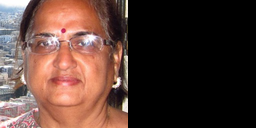

2
11


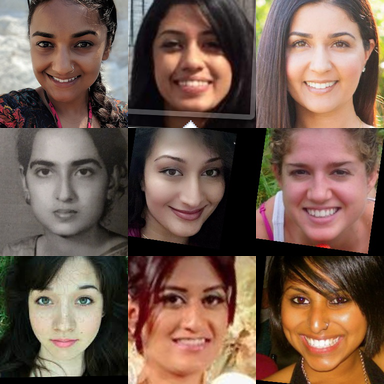

3
10


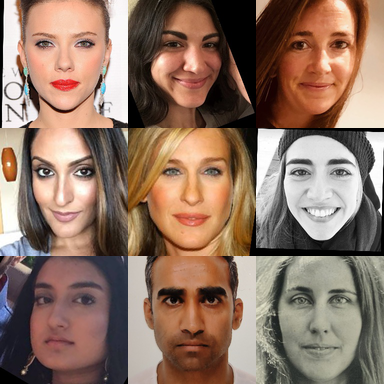

4
12


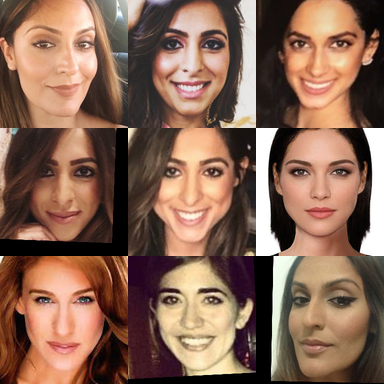

In [17]:

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=_square_sizer(len(args))
    ))
    


scarlett johansen photo which scored very highly (but the rest of her photos tanked) One of amna also scored very highly but the other one was mundane.


0.844544856280437


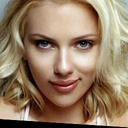

0.7446859135456975


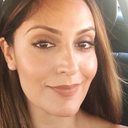

0.7317927855268922


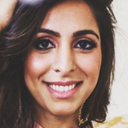

0.679278344317202


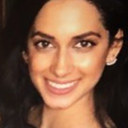

0.6723947662348789


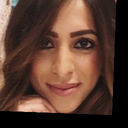

0.6538359754677083


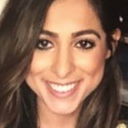

0.6478146417196169


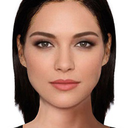

0.6462886803923219


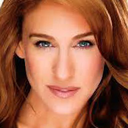

0.64529432365716


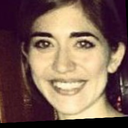

0.6443110864692442


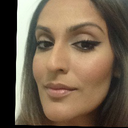

0.6342755333218408


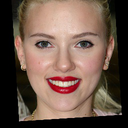

0.6329869072894372


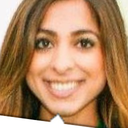

0.6317452579338149


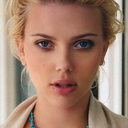

0.5986125378963655


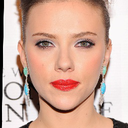

0.587120203102532


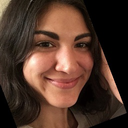

0.5868470615389996


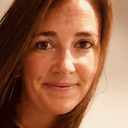

0.5742601112347128


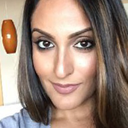

0.5581588321843312


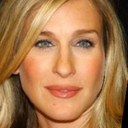

0.5033240119417962


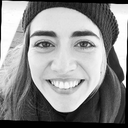

0.48294392610366205


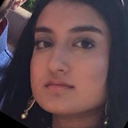

0.4382264416457837


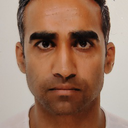

0.40315895021203196


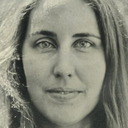

0.400058968320978


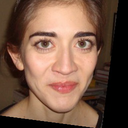

0.39686390636577296


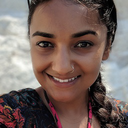

0.3928921647274341


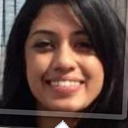

0.39037324455671285


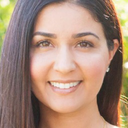

0.38762427196328075


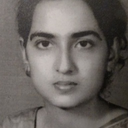

0.36497339152665825


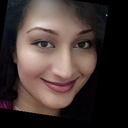

0.333820625894062


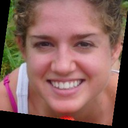

0.3295845714841942


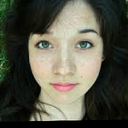

0.32863941744206143


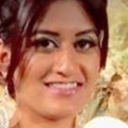

0.27146485314679697


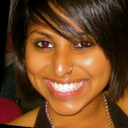

0.24176005637456327


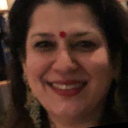

0.23515689182358718


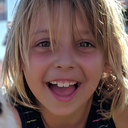

0.14955509336756875


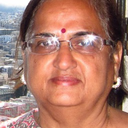

In [25]:
for idx in range(len(sorted_arrays_rescaled)):
    print(sorted_probas[idx])
    display(sorted_arrays_rescaled[idx])
    